# PROJECT 2: “INFORMATION THEORY AND CRYPTOGRAPHY”
Cryptography is the study of protecting data by converting it into a secure format that allows only the intended users to access it. The study area has strong connections to information theory, particularly the concept of entropy. In this project, you explore this connection via the one-time pad encryption technique as follows:

- Study and describe how one-time pad encryption chooses the key and generates a cipher from the plaintext.
- Define perfect secrecy using entropy and prove that the one-time pad can achieve it.
- Choose an English passage with more than 2000 characters as the plaintext.
- Define a set of possible plaintext characters and compute their probability distribution using the frequency of each character appearing in the passage.
- Apply the one-time pad on the plaintext to obtain ciphertext.
- Plot the unconditional distribution of the plaintext characters and their distribution conditioned on a cipher character.
- Verify the above claim by computing the entropies of two distributions.

Present your study in a report with appropriate references, which must be uploaded to the Information Theory and Cryptography folder. The report should demonstrate your understanding of the one-time pad technique, details of the proof, and simulation results. You are encouraged to add any other ideas/results, however small.

In [1]:
import numpy as np
import random
import collections
import string
from math import log2
import matplotlib.pyplot as plt

In [2]:
#Character Set
charset = string.ascii_lowercase + ' ?.,;:-\'"\n'
print("Fixed charset:", charset)

#Generate key given message length and character set
def generate_key(length, charset):
    return ''.join(random.choice(charset) for _ in range(length))

#Encrypt message given message, key and character set
def otp_encrypt(plaintext, key, charset):
    char_to_num = {char: idx for idx, char in enumerate(charset)}
    num_to_char = {idx: char for idx, char in enumerate(charset)}
    
    ciphertext = []
    for p_char, k_char in zip(plaintext, key):
        p_val = char_to_num[p_char]
        k_val = char_to_num[k_char]
        c_val = (p_val + k_val) % len(charset)
        ciphertext.append(num_to_char[c_val])
    return ''.join(ciphertext)

#Decrypt message given message, key and character set
def otp_decrypt(ciphertext, key, charset):
    char_to_num = {char: idx for idx, char in enumerate(charset)}
    num_to_char = {idx: char for idx, char in enumerate(charset)}
    
    plaintext = []
    for c_char, k_char in zip(ciphertext, key):
        c_val = char_to_num[c_char]
        k_val = char_to_num[k_char]
        p_val = (c_val - k_val) % len(charset)
        plaintext.append(num_to_char[p_val])
    return ''.join(plaintext)

Fixed charset: abcdefghijklmnopqrstuvwxyz ?.,;:-'"



In [3]:
# Demo code
plaintext =  'Hello World'
plaintext = plaintext.lower()
key = generate_key(len(plaintext), charset)
ciphertext = otp_encrypt(plaintext, key, charset)
message = otp_decrypt(ciphertext, key, charset)

print('Plaintext: ', plaintext)
print('Ciphertext: ', ciphertext)
print('Decrypted Message: ', message)

Plaintext:  hello world
Ciphertext:  dmmecy jle:
Decrypted Message:  hello world


In [4]:
# Load plaintext
with open("dante.txt", "r") as f:
    plaintext = f.read()

# Convert to lowercase
plaintext = plaintext.lower()

# Ignore characters not present in character set
plaintext = ''.join(c for c in plaintext if c in charset)

In [5]:
#Compute character distribution of plaintext message
char_count = collections.Counter(plaintext)
total_chars = sum(char_count.values())
plaintext_prob = [char_count[char] / total_chars for char in charset]

# print("Plaintext character distribution:")
# for char, prob in zip(charset, plaintext_prob):
#     print(f"'{char}': {prob:.4f}")


In [6]:
#Generate key and ciphertext

key = generate_key(len(plaintext), charset)
ciphertext = otp_encrypt(plaintext, key, charset)

Selected ciphertext character: 'p'


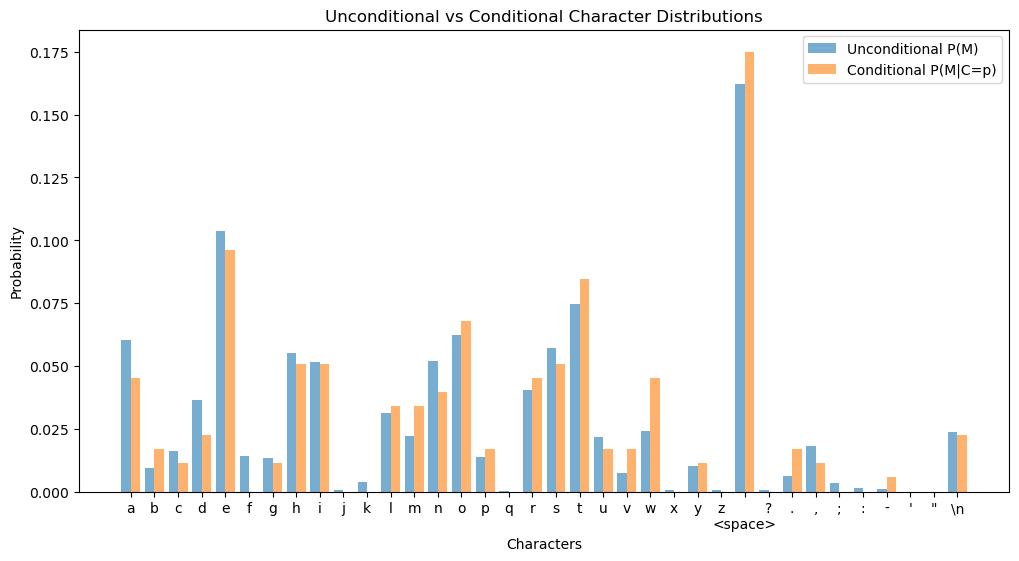

Unconditional entropy H(M): 4.2608 bits
Conditional entropy H(M|C=p): 4.1867 bits


In [ ]:
#Choose character on which to center distribution 
cipher_char = random.choice(ciphertext)
print(f"Selected ciphertext character: '{cipher_char}'")

#Compute conditional probability of each character in plaintext given ciphertext character c
conditional_count = collections.Counter()
total_conditioned = 0

for p_char, c_char in zip(plaintext, ciphertext):
    if c_char == cipher_char:
        conditional_count[p_char] += 1
        total_conditioned += 1

conditional_prob = [conditional_count[char]/total_conditioned if total_conditioned > 0 else 0.0 for char in charset]

# print("\nConditional character distribution:")
# for char, prob in zip(charset, conditional_probs):
#     print(f"'{char}': {prob:.4f}")

#Plot 
x = np.arange(len(charset))  # numeric x-axis for bars
tick_labels = [
    '\n<space>' if char == ' ' else 
    '\\n' if char == '\n' else 
    char 
    for char in charset
]

plt.figure(figsize=(12,6))
plt.bar(x - 0.2, plaintext_prob, width=0.4, alpha=0.6, label='Unconditional P(M)')
plt.bar(x + 0.2, conditional_prob, width=0.4, alpha=0.6, label=f'Conditional P(M|C={cipher_char})')
plt.xlabel('Characters')
plt.ylabel('Probability')
plt.xticks(x, tick_labels)
plt.legend()
plt.title('Unconditional vs Conditional Character Distributions')
plt.show()

def entropy(probabilities):
    return -sum(p * log2(p) for p in probabilities if p > 0)

H_P = entropy(plaintext_prob)
H_P_given_C = entropy(conditional_prob)

print(f"Unconditional entropy H(M): {H_P:.4f} bits")
print(f"Conditional entropy H(M|C={cipher_char}): {H_P_given_C:.4f} bits")